kek


NameError: name 'make_predict' is not defined

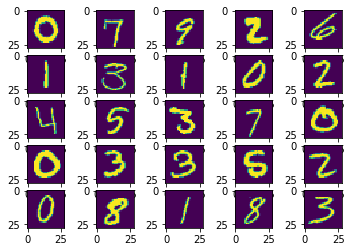

In [3]:
import pygame 
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file=r'../neironka/train.csv'
fileTest=r'../neironka/test.csv'
train=pd.read_csv(file)
dataTest=pd.read_csv(fileTest)
trainNumbers=train['label']
train=train.drop(labels=['label'],axis = 1)

from keras.utils.np_utils import to_categorical

trainNumbers= to_categorical(trainNumbers,num_classes=10)

train=train/255.0
test=dataTest/255.0
train=train.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)


import math
f, ax = plt.subplots(5, 5)
for i in range(1,26):
    data = train.iloc[i,1:785].values 
    nrows, ncols = 28, 28
    grid = data.reshape((nrows, ncols))
    n=math.ceil(i/5)-1
    m=[0,1,2,3,4]*5
    ax[m[i-1], n].imshow(grid)

    
def make_predict(img):
    img=img.resize((28,28))
    img=img.convert('L')
    img=np.array(img)
    img=img.reshape(1,28,28,1)
    img=img/255.0
    
    result=model.predict([img])[0]
    return np.argmax(result), max(result)
    
pygame.init()
scr=pygame.display.set_mode((600,400))
scr.fill((255,255,255))
pygame.display.update()
txt=pygame.font.Font(None,30)
clock=pygame.time.Clock()
FPS=60

p=True
checker=False
while p:
    for i in pygame.event.get():
        if i.type==pygame.QUIT:
            p=False
        if i.type==pygame.MOUSEBUTTONDOWN:
            if (i.button==1):
                checker=True
            if(i.button==3):
                print('kek')
                pygame.image.save(scr,'predict.png')
                pr=pygame.image.load('predict.png')
                prediction = make_predict(pr)
               # text=txt.render('Prediction:{0}'.format(prediction),True, (0,0,0))
                #scr.blit(text,(16,16))
                pygame.display.update()
        if i.type==pygame.MOUSEBUTTONUP:
            if (i.button==1):
                checker=False
        if i.type==pygame.MOUSEMOTION and checker==True:
            pygame.draw.circle(scr, (0,0,0), i.pos, 10)

        
        
                
                
    clock.tick(FPS)
    pygame.display.update()

